In [13]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn import cross_validation
from math import sqrt # for root mean-squared error calculation
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

In [14]:
train_raw_real = pd.read_csv('train_housing.csv', index_col='Id')
test_raw = pd.read_csv('test_housing.csv',index_col='Id')
train_raw = pd.concat((train_raw_real.drop(['SalePrice'], axis = 1),test_raw))

In [15]:
train_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


In [16]:
test_raw.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [17]:
train_raw.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=2919)

In [18]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [19]:
train_raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [20]:
train_raw.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [21]:
train_raw_real['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

C:\Users\jackm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


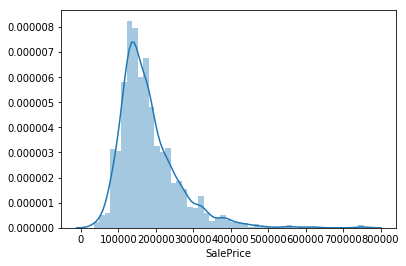

In [22]:
sns.distplot(train_raw_real['SalePrice'])

C:\Users\jackm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


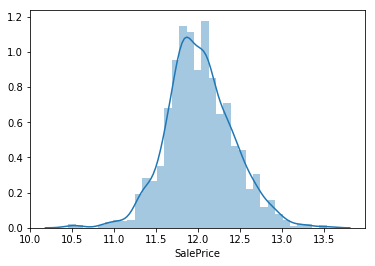

In [23]:
train_raw_real['SalePrice']= np.log(train_raw_real['SalePrice'])
sns.distplot(train_raw_real['SalePrice'])

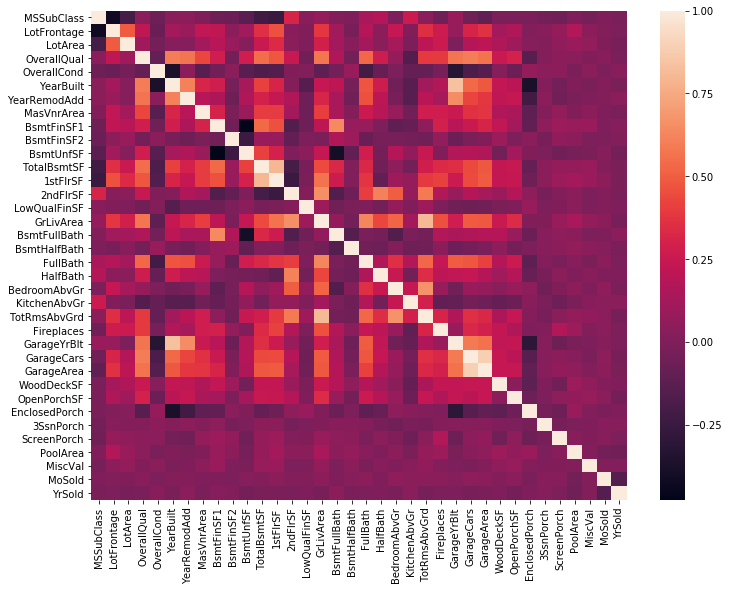

In [24]:
plt.subplots(figsize = (12,9))
sns.heatmap(train_raw.corr())

In [25]:
ratio_isnull = train_raw.isnull().sum()/len(train_raw)
ratio_isnull = ratio_isnull.drop(ratio_isnull[ratio_isnull == 0].index).sort_values(ascending=False)

ratio_isnull

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

In [26]:
for i in ratio_isnull.index:
    print(train_raw[i].value_counts())

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
        ... 
140.0      2
122.0      2
116.0      2
149.0      2
150.0      2
174.0      2
25.0       1
123.0      1
135.0      1
111.0      1
117.0      1
131.0      1
200.0      1
22.0       1
136.0      1
28.0       1
31.0       1
133.0      1
155.0      1
153.0      1


In [27]:
#to insert categorical varibale "none" for quality or type features if NA
train_raw[ratio_isnull.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 34 columns):
PoolQC          10 non-null object
MiscFeature     105 non-null object
Alley           198 non-null object
Fence           571 non-null object
FireplaceQu     1499 non-null object
LotFrontage     2433 non-null float64
GarageFinish    2760 non-null object
GarageYrBlt     2760 non-null float64
GarageQual      2760 non-null object
GarageCond      2760 non-null object
GarageType      2762 non-null object
BsmtExposure    2837 non-null object
BsmtCond        2837 non-null object
BsmtQual        2838 non-null object
BsmtFinType2    2839 non-null object
BsmtFinType1    2840 non-null object
MasVnrType      2895 non-null object
MasVnrArea      2896 non-null float64
MSZoning        2915 non-null object
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
Utilities       2917 non-null object
Functional      2917 non-null object
Exterior2nd     2918 non-null object
Exter

In [28]:
train_raw["PoolQC"] = train_raw["PoolQC"].fillna("None")
train_raw["MiscFeature"] = train_raw["MiscFeature"].fillna("None")
train_raw["Alley"] = train_raw["Alley"].fillna("None")
train_raw["Fence"] = train_raw["Fence"].fillna("None")
train_raw["FireplaceQu"] = train_raw["FireplaceQu"].fillna("None")

In [29]:
ratio_isnull = train_raw.isnull().sum()/len(train_raw)
ratio_isnull = ratio_isnull.drop(ratio_isnull[ratio_isnull == 0].index).sort_values(ascending=False)
ratio_isnull

LotFrontage     0.166495
GarageQual      0.054471
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtHalfBath    0.000685
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
BsmtUnfSF       0.000343
dtype: float64

In [30]:
train_raw.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

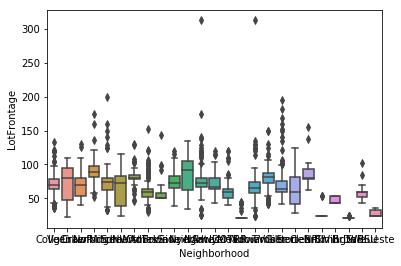

In [31]:
sns.boxplot(x = 'Neighborhood', y = 'LotFrontage', data = train_raw)

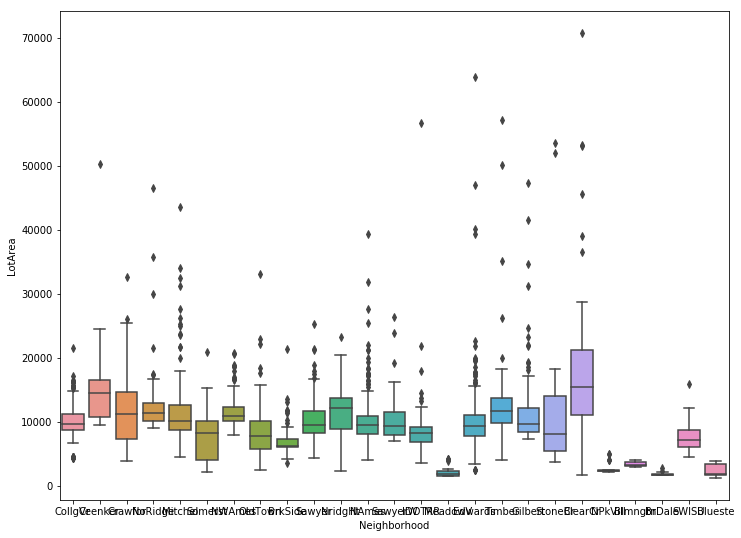

In [32]:
plt.subplots(figsize = (12,9))
sns.boxplot(x = 'Neighborhood', y = 'LotArea', data = train_raw[train_raw['LotArea']<100000])

In [33]:
train_raw["LotFrontage"] = train_raw.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [34]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 no

In [35]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_raw[col] = train_raw[col].fillna('None')

In [36]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_raw[col] = train_raw[col].fillna(0)

In [37]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_raw[col] = train_raw[col].fillna(0)


In [38]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_raw[col] = train_raw[col].fillna('None')


In [39]:
train_raw["MasVnrType"] = train_raw["MasVnrType"].fillna("None")
train_raw["MasVnrArea"] = train_raw["MasVnrArea"].fillna(0)

In [40]:
train_raw['MSZoning'] = train_raw['MSZoning'].fillna(train_raw['MSZoning'].mode()[0])


In [41]:
train_raw = train_raw.drop(['Utilities'], axis=1)

In [42]:
train_raw["Functional"] = train_raw["Functional"].fillna("Typ")

In [43]:
train_raw['Electrical'] = train_raw['Electrical'].fillna(train_raw['Electrical'].mode()[0])

In [44]:
train_raw['KitchenQual'] = train_raw['KitchenQual'].fillna(train_raw['KitchenQual'].mode()[0])

In [45]:
train_raw['Exterior1st'] = train_raw['Exterior1st'].fillna(train_raw['Exterior1st'].mode()[0])
train_raw['Exterior2nd'] = train_raw['Exterior2nd'].fillna(train_raw['Exterior2nd'].mode()[0])

In [46]:
train_raw['SaleType'] = train_raw['SaleType'].fillna(train_raw['SaleType'].mode()[0])


In [47]:
train_raw['MSSubClass'] = train_raw['MSSubClass'].fillna("None")

In [48]:
ratio_isnull = train_raw.isnull().sum()/len(train_raw)
ratio_isnull = ratio_isnull.drop(ratio_isnull[ratio_isnull == 0].index).sort_values(ascending=False)
ratio_isnull

Series([], dtype: float64)

In [49]:
train_raw['MoSold'].describe()

count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [50]:
test_raw['MoSold'].describe()

count    1459.000000
mean        6.104181
std         2.722432
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [51]:
train_raw['MSSubClass'] = train_raw['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train_raw['OverallCond'] = train_raw['OverallCond'].astype(str)
train_raw['OverallQual'] = train_raw['OverallQual'].astype(str)

#Year and month sold are transformed into categorical features.
train_raw['YrSold'] = train_raw['YrSold'].astype(str)
train_raw['MoSold'] = train_raw['MoSold'].astype(str)


In [52]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 78 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null object
OverallCond      2919 non-null object
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919

In [53]:
train_raw.shape

(2919, 78)

In [54]:
#do I add dummies or label encode

In [55]:
#pd.get_dummies(train_raw).describe()

In [56]:
train_raw.shape

(2919, 78)

In [57]:
print(train_raw.select_dtypes(np.number).head())

    LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                                                                          
1          65.0     8450       2003          2003       196.0       706.0   
2          80.0     9600       1976          1976         0.0       978.0   
3          68.0    11250       2001          2002       162.0       486.0   
4          60.0     9550       1915          1970         0.0       216.0   
5          84.0    14260       2000          2000       350.0       655.0   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageYrBlt  \
Id                                                ...                
1          0.0      150.0        856.0       856  ...       2003.0   
2          0.0      284.0       1262.0      1262  ...       1976.0   
3          0.0      434.0        920.0       920  ...       2001.0   
4          0.0      540.0        756.0       961  ...       1998.0   
5          0.0      490.0       1145.0  

In [58]:
#convert numeric categorical variable into a categorical object
#then get dummies

In [59]:
train_clean = pd.get_dummies(train_raw,drop_first = True)

In [60]:
for each in (pd.get_dummies(train_raw, drop_first=True).columns):
    print(each)

LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MSSubClass_150
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSSubClass_20
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_None
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDO

In [61]:
train_clean.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=300)

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
lr =  LinearRegression()
ridge = Ridge(alpha = 4,solver="sag",fit_intercept = True)
lasso = Lasso(alpha = .0007)
enet = ElasticNet(alpha = .001, l1_ratio = .5 )

In [64]:
scores = cross_val_score(lr, train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'], scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.27180475, 0.1695385 , 0.18027858, 0.12224365, 0.20266796])

In [65]:
for model in [lr,ridge,lasso,enet]:
    scores = cross_val_score(model, train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'], scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-scores)
    print(rmse_scores.mean())
    print(rmse_scores.std())

0.18930668788115207
0.04889620236310631
0.2308444194509422
0.033296496116132716
0.14356998550561467
0.02717769979306158
0.1426602875932907
0.026102123484122927


In [66]:
lasso.fit(train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'])
#does this affect the instance?

Lasso(alpha=0.0007, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
#(train_clean.loc[train_raw_real.index,]['MSZoning']=='RL').sum()

In [68]:
#train_clean.loc[train_raw_real.index,]

In [69]:
y_test = lasso.predict(train_clean.loc[test_raw.index,])

y_test = np.exp(y_test)

y_test

test_output = pd.DataFrame(y_test,index = test_raw.index,columns=['SalePrice'])
test_output.head()

test_output.to_csv('AMES_submission.csv',index=True)

In [70]:
#try out stochastic gradiant descent if I have time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\jackm\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
tree_reg = DecisionTreeRegressor(max_depth =None)
tree_reg.fit(train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
np.sqrt(len(train_clean.columns))

17.320508075688775

In [207]:
modelname = []
rmsescore = []
stdrmsescore = []

for model in [lr,ridge,lasso,enet,loaded_model,loaded_model2]:
    scores = cross_val_score(model, train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'], scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-scores)
    modelname.append(model.__class__.__name__)
    rmsescore.append(round(rmse_scores.mean(),3))
    stdrmsescore.append(round(rmse_scores.std(),3))

In [208]:
modelname

['LinearRegression',
 'Ridge',
 'Lasso',
 'ElasticNet',
 'RandomForestRegressor',
 'GradientBoostingRegressor']

In [209]:
rmsescore

[0.189, 0.231, 0.144, 0.143, 0.146, 0.128]

In [210]:
stdrmsescore

[0.049, 0.033, 0.027, 0.026, 0.01, 0.008]

NameError: name 'stdrmsescore' is not defined

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1, verbose=1, cv=5)

grid_search_cv.fit(train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'])

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:   29.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [96]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=92, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [84]:
rfr = RandomForestRegressor(n_estimators = 10000, max_features='log2',random_state = 0)
rfr.fit(train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'])
rfr.feature_importances_


array([1.69183490e-02, 2.17957451e-02, 3.50225378e-02, 2.57562358e-02,
       1.28312947e-02, 1.91876921e-02, 1.42540082e-03, 9.14884199e-03,
       3.62674927e-02, 3.40512288e-02, 1.74126273e-02, 4.99135316e-04,
       4.85682007e-02, 4.02070270e-03, 6.40796312e-04, 2.76067970e-02,
       6.41081294e-03, 7.91002973e-03, 1.32931319e-03, 2.14046720e-02,
       2.05758104e-02, 3.00493221e-02, 3.23015862e-02, 3.31360567e-02,
       9.48695858e-03, 1.59669783e-02, 2.75427083e-03, 2.85457394e-04,
       1.82962658e-03, 4.43836014e-04, 6.20728315e-04, 0.00000000e+00,
       1.05962652e-03, 3.04668165e-04, 4.05031703e-04, 2.01537987e-03,
       5.73450176e-03, 6.85665132e-05, 1.32675968e-04, 1.30734833e-03,
       8.46611400e-03, 9.15632657e-04, 3.48899631e-04, 4.06610964e-04,
       1.14096380e-04, 7.95200311e-04, 5.77727378e-04, 2.32729907e-04,
       5.18583285e-03, 6.13664970e-03, 2.76105849e-04, 8.92837521e-04,
       6.51478549e-04, 7.15554188e-04, 2.97337181e-04, 3.91453057e-03,
      

In [90]:
important_features_dict = {}
for x,i in enumerate(rfr.feature_importances_):
    important_features_dict[train_clean.columns[x]]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for key, value in sorted(important_features_dict.items(), key=lambda item: item[1],reverse=True):
    print("%s: %s" % (key, value))

GrLivArea: 0.04856820069901061
TotalBsmtSF: 0.03626749266992071
YearBuilt: 0.035022537831549884
1stFlrSF: 0.03405122876208175
GarageArea: 0.03313605669535008
GarageCars: 0.03230158624721076
GarageYrBlt: 0.03004932211127157
FullBath: 0.027606797042137664
ExterQual_TA: 0.02628498201942955
YearRemodAdd: 0.02575623576796271
LotArea: 0.021795745141067416
TotRmsAbvGrd: 0.021404671994624674
KitchenQual_TA: 0.02063854796976924
Fireplaces: 0.0205758103961799
BsmtFinSF1: 0.019187692082289164
FireplaceQu_None: 0.01907397843988246
2ndFlrSF: 0.017412627349956772
Foundation_PConc: 0.01739278246328758
LotFrontage: 0.016918349002089005
ExterQual_Gd: 0.016300649420833684
OpenPorchSF: 0.015966978263164493
MasVnrArea: 0.012831294650538854
BsmtQual_TA: 0.012820108965335192
GarageFinish_Unf: 0.010612022133104594
OverallQual_8: 0.010396727117924718
BsmtFinType1_GLQ: 0.010391116193665157
GarageType_Attchd: 0.010148863112733731
WoodDeckSF: 0.009486958582702648
KitchenQual_Gd: 0.009456444265278065
BsmtUnfSF: 0

In [73]:
important_features_dict

{0: 0.01679530064211282,
 1: 0.02129646209562468,
 2: 0.03547947742239166,
 3: 0.024757159452786743,
 4: 0.012979079057770482,
 5: 0.01912213351715268,
 6: 0.0014373772711884693,
 7: 0.009234401824059749,
 8: 0.03704447555376167,
 9: 0.034116168394362024,
 10: 0.01728812487288636,
 11: 0.00048390792216855744,
 12: 0.04889247670689043,
 13: 0.004009159066078385,
 14: 0.00066788783498347,
 15: 0.027335387619537244,
 16: 0.006377635571465206,
 17: 0.007788961406200867,
 18: 0.0013216783075461831,
 19: 0.021764626854148296,
 20: 0.020177772310866388,
 21: 0.030062901475843437,
 22: 0.03324792562862833,
 23: 0.032831002480884025,
 24: 0.009450723490318617,
 25: 0.016162402522299765,
 26: 0.0027283550960137443,
 27: 0.0002797786205373655,
 28: 0.001786898871222144,
 29: 0.00043327419322217154,
 30: 0.0006350549827724377,
 31: 0.0,
 32: 0.001045642901597335,
 33: 0.0003105227808223176,
 34: 0.00038539404245078795,
 35: 0.002011427363869686,
 36: 0.005695443280834837,
 37: 7.321667470414243e-0

In [ ]:
or key, value in sorted(mydict.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

In [71]:
enumerate(rfr.feature_importances_)

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [100]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [101]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
import pickle

In [116]:
filename= 'randomforestmodel.sav'
#pickle.dump(rf_random.best_estimator_, open(filename,'wb'))

In [117]:
loaded_model = pickle.load(open(filename,'rb'))

In [119]:

important_features_dict = {}
for x,i in enumerate(loaded_model.feature_importances_):
    important_features_dict[train_clean.columns[x]]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for key, value in sorted(important_features_dict.items(), key=lambda item: item[1],reverse=True):
    print("%s: %s" % (key, value))

GrLivArea: 0.08382112017798785
GarageCars: 0.053208137693375936
YearBuilt: 0.0512771561088936
TotalBsmtSF: 0.04436686039517709
1stFlrSF: 0.04143578970574678
GarageArea: 0.040359336150961045
FullBath: 0.03721251217494408
GarageYrBlt: 0.03702425194833392
ExterQual_TA: 0.03635524479929455
YearRemodAdd: 0.027232037639368593
KitchenQual_TA: 0.025347494595123154
LotArea: 0.02374959101083328
Fireplaces: 0.02294736854464232
TotRmsAbvGrd: 0.02204446023950536
BsmtFinSF1: 0.02163490386792359
2ndFlrSF: 0.018001198124297603
FireplaceQu_None: 0.016742612072048895
LotFrontage: 0.015505813652582688
Foundation_PConc: 0.015270423901871177
OpenPorchSF: 0.01400640936822326
ExterQual_Gd: 0.01189985087900949
MasVnrArea: 0.010164052338313322
GarageType_Attchd: 0.009747637715514566
BsmtQual_TA: 0.009421069753495586
MSSubClass_60: 0.008914126360795428
GarageFinish_Unf: 0.008601060468397776
OverallQual_8: 0.008257392341867575
KitchenQual_Gd: 0.007708518496828397
CentralAir_Y: 0.0075131096763362505
BedroomAbvGr:

In [121]:
scores = cross_val_score(loaded_model, train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'], scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-scores)
print(loaded_model.__class__.__name__,":")
print(rmse_scores.mean())
print(rmse_scores.std())

RandomForestRegressor :
0.1458793161531371
0.009755075593900655


In [ ]:
#what is it that I'd like to do with Gradient Boosting

In [124]:
from sklearn.ensemble  import GradientBoostingRegressor

In [162]:
gbr = GradientBoostingRegressor(n_estimators=400,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='log2',
                                min_samples_leaf=1,
                                min_samples_split=2,
                                loss='huber',
                                warm_start= True,
                                random_state=42)

In [163]:
scores = cross_val_score(gbr, train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'], scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-scores)
print(gbr.__class__.__name__,":")
print(rmse_scores.mean())
print(rmse_scores.std())

GradientBoostingRegressor :
0.16065837812803635
0.010456141113583688


In [188]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 4000, num = 10)]
# Number of features to consider at every split
max_features = ['log2','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8,16]
# Method of selecting samples for training each tree
#learning rate tuning
lr_list = [.05, 0.075, .1]
# Create the random grid
warm_start = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate':lr_list,
              'warm_start':warm_start}
print(random_grid)

{'n_estimators': [100, 533, 966, 1400, 1833, 2266, 2700, 3133, 3566, 4000], 'max_features': ['log2'], 'max_depth': [5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 8, 16], 'learning_rate': [0.075], 'warm_start': [True, False]}


In [189]:
gbr_random = RandomizedSearchCV(estimator = gbr, 
                                param_distributions = random_grid, 
                                n_iter = 50, 
                                cv = 3, 
                                scoring="neg_mean_squared_error",
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)

In [190]:
gbr_random

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=4,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=True),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [100, 533, 966, 1400, 1833, 2266, 2700, 3133, 3566, 4000], 'max_features': ['log2'], 'max_depth': [5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 8, 16], 'learning_rate': [0.075], 'warm_start': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          retur

In [191]:
gbr_random.fit(train_clean.loc[train_raw_real.index,], 
               train_raw_real['SalePrice'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=4,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=True),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [100, 533, 966, 1400, 1833, 2266, 2700, 3133, 3566, 4000], 'max_features': ['log2'], 'max_depth': [5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 8, 16], 'learning_rate': [0.075], 'warm_start': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          retur

In [192]:
gbr_random.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.075, loss='huber', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=20,
             min_weight_fraction_leaf=0.0, n_estimators=1833,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [ ]:
best_gradient_boosting_model = gbr_random.best_estimator_

In [ ]:
#from sklearn import tree
#from sklearn.tree import export_graphviz
#import pydotplus

In [196]:
scores = cross_val_score(gbr_random.best_estimator_, train_clean.loc[train_raw_real.index,], train_raw_real['SalePrice'], scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-scores)
print(gbr_random.best_estimator_.__class__.__name__,":")
print(rmse_scores.mean())
print(rmse_scores.std())

GradientBoostingRegressor :
0.12788060845557264
0.0075928948253620576


In [193]:
best_gradient_boosting_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.075, loss='huber', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1411,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [77]:
filename= 'gradient_boosting_model.sav'
#pickle.dump(gbr_random.best_estimator_, open(filename,'wb'))

In [78]:
loaded_model2 = pickle.load(open(filename,'rb'))

In [ ]:
#dot_data = tree.export_graphviz(tree_reg, out_file =None,feature_names=train_clean.columns)

In [79]:
y_test = loaded_model2.predict(train_clean.loc[test_raw.index,])

y_test = np.exp(y_test)

y_test

test_output = pd.DataFrame(y_test,index = test_raw.index,columns=['SalePrice'])
test_output.head()

test_output.to_csv('AMES_submission.csv',index=True)

In [80]:
important_features_dict = {}
for x,i in enumerate(loaded_model2.feature_importances_):
    important_features_dict[train_clean.columns[x]]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for key, value in sorted(important_features_dict.items(), key=lambda item: item[1],reverse=True):
    print("%s: %s" % (key, value))

LotArea: 0.038984921275034994
GrLivArea: 0.03643790129485824
BsmtUnfSF: 0.033266941027784866
1stFlrSF: 0.029203308956630404
GarageArea: 0.028681663517002635
TotalBsmtSF: 0.026763712497630734
BsmtFinSF1: 0.02529851592947416
LotFrontage: 0.024235573539950067
YearBuilt: 0.022717428573036352
GarageYrBlt: 0.022131320040752432
OpenPorchSF: 0.021199156437225662
MasVnrArea: 0.02035597257140854
WoodDeckSF: 0.020174818623678675
YearRemodAdd: 0.0184327108369952
2ndFlrSF: 0.018079390039523753
TotRmsAbvGrd: 0.012607387418753519
EnclosedPorch: 0.01076890028569541
BedroomAbvGr: 0.01005089358344881
ScreenPorch: 0.009225491192860358
GarageCars: 0.00907733773444325
Fireplaces: 0.007346095951730213
FullBath: 0.007183497640288461
BsmtFullBath: 0.006807098893599919
BsmtFinSF2: 0.006710663520944536
3SsnPorch: 0.006465536328625948
BsmtHalfBath: 0.005765637827924933
YrSold_2010: 0.005307668984605831
BsmtExposure_Gd: 0.005225881302470791
FireplaceQu_None: 0.005023626865240894
BsmtFinType1_GLQ: 0.00496611102082

In [ ]:
# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  

In [ ]:
#from IPython.display import Image  

In [ ]:
# Show graph
#import os

#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['Anaconda3']+r"\Library\bin\graphviz"
#Image(graph.create_png())

In [ ]:
train_raw.columns